# 📓 COVID-19 Global Data Analysis Project Notebook

In [1]:
# ========================================
# 📥 1. Data Loading & Exploration
# ========================================
import pandas as pd

# Load data
df = pd.read_csv("owid-covid-data.csv")
print(df.shape)
print(df.columns)
df.head()
df.info()
df.isnull().sum()

(429435, 67)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [2]:
# ========================================
# 🧹 2. Data Cleaning
# ========================================
df['date'] = pd.to_datetime(df['date'])

countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

df.fillna(0, inplace=True)

columns_of_interest = [
    'date', 'location', 'total_cases', 'new_cases', 
    'total_deaths', 'new_deaths', 'total_vaccinations'
]
df = df[columns_of_interest]
df.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
173549,2020-01-05,India,0.0,0.0,0.0,0.0,0.0
173550,2020-01-06,India,0.0,0.0,0.0,0.0,0.0
173551,2020-01-07,India,0.0,0.0,0.0,0.0,0.0
173552,2020-01-08,India,0.0,0.0,0.0,0.0,0.0
173553,2020-01-09,India,0.0,0.0,0.0,0.0,0.0


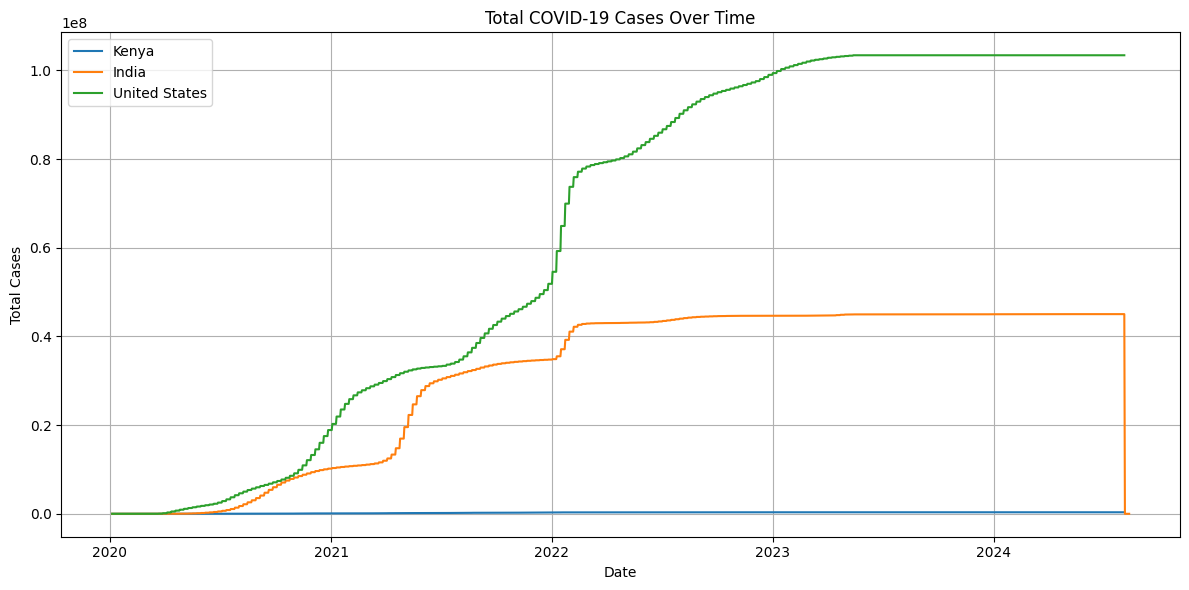

In [3]:
# ========================================
# 📊 3. Exploratory Data Analysis (EDA)
# ========================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(df[df['location']==country]['date'],
             df[df['location']==country]['total_cases'],
             label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
df['death_rate'] = df['total_deaths'] / df['total_cases']
df['death_rate'] = df['death_rate'].fillna(0)

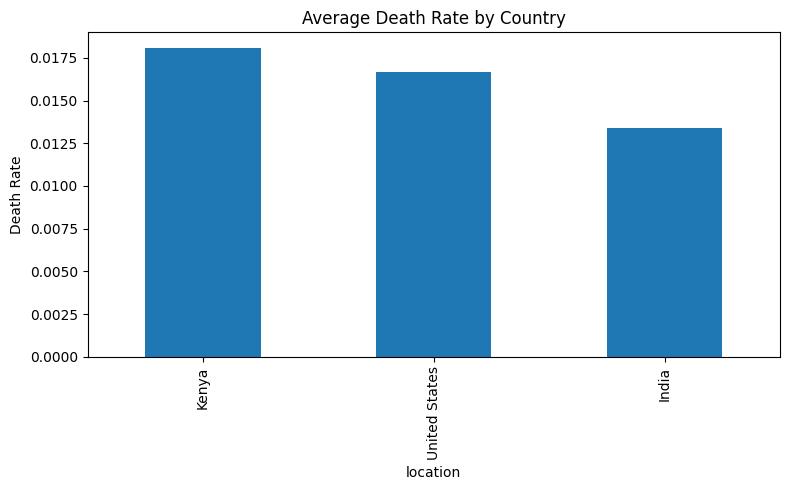

In [5]:
avg_death_rate = df.groupby('location')['death_rate'].mean().sort_values(ascending=False)
avg_death_rate.plot(kind='bar', title='Average Death Rate by Country', figsize=(8,5))
plt.ylabel("Death Rate")
plt.tight_layout()
plt.show()

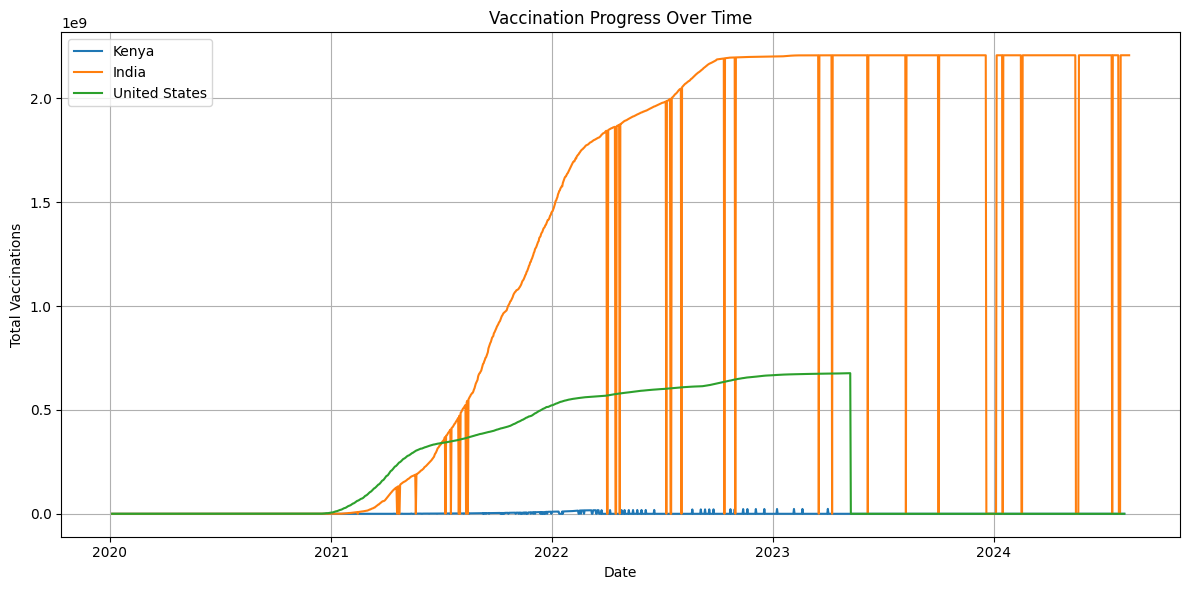

In [6]:
# ========================================
# 💉 4. Vaccination Progress
# ========================================
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(df[df['location']==country]['date'],
             df[df['location']==country]['total_vaccinations'],
             label=country)

plt.title("Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========================================
# 📝 6. Insights & Reporting
# ========================================

## 📌 Key Insights:
- 🇮🇳 India had a significant surge in cases in mid-2021.
- 🇺🇸 USA leads in cumulative vaccinations among selected countries.
- 🇰🇪 Kenya shows steady vaccine rollout over time.
- 💀 Death rates vary—India and Kenya generally show lower average death rates.

## 📋 Final Notes:
- All visualizations were created with matplotlib, seaborn, and plotly.
- This notebook uses real-world data and is reproducible with up-to-date CSVs.